1. Descriptive statistics of your dataset; number of data points, number of descriptive features, type of features, your target    feature, and its type.
2. Explore your features further in their distributions and plot their box plots. Show outliers for each feature. Do you think    any of the outliers may impact your analysis? Why? 
3. Relationship between fixed acidity,volatile acidity,citric acid,	residual sugar,	chlorides,free sulfur dioxide ,total sulfur   dioxide,density, pH, sulphates, alcohol with respect to the quality of wine.
3. Which are positive and negative contributors to a good quality wine?
4. What is the best definition of wine quality?


Importing libraries...

In [26]:
import numpy as np
import pandas as pd
data = pd.read_csv("https://s3.amazonaws.com/filtereddatasets/Wine_Dine/winequality-red.csv")

import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, r2_score, accuracy_score, mean_absolute_error

Understanding the data

In [27]:
data.shape # (Q) how many data-points and features?

(1599, 12)

In [28]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [30]:
#checking any null values ...
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [31]:
#(Q) How many data points for each class of quality are present? 

data["quality"].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

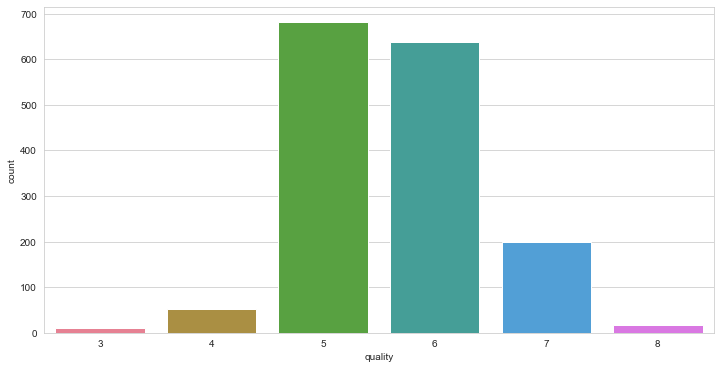

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.countplot(x="quality", data=data, palette='husl');

##### we can try and understand which feature results in increasing quality of red wine ... for this we can create a subdivision among our quality dataset as "good"=1, "bad"=2 and assign it to a new feature called quality

In [33]:
new=[]
for row in data['quality']:
    if (row<=5):
        val=2
    else:
        val=1
    new.append(val)

seperating the target variable from the dataset to understand features more accurately

In [34]:
X = data.drop('quality',axis=1)
y = data[['quality']]

print(X.columns)
print(y.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Index(['quality'], dtype='object')


In [38]:
#descriptive statistics of the data 
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


Univariate Analysis

Text(0, 0.5, '')

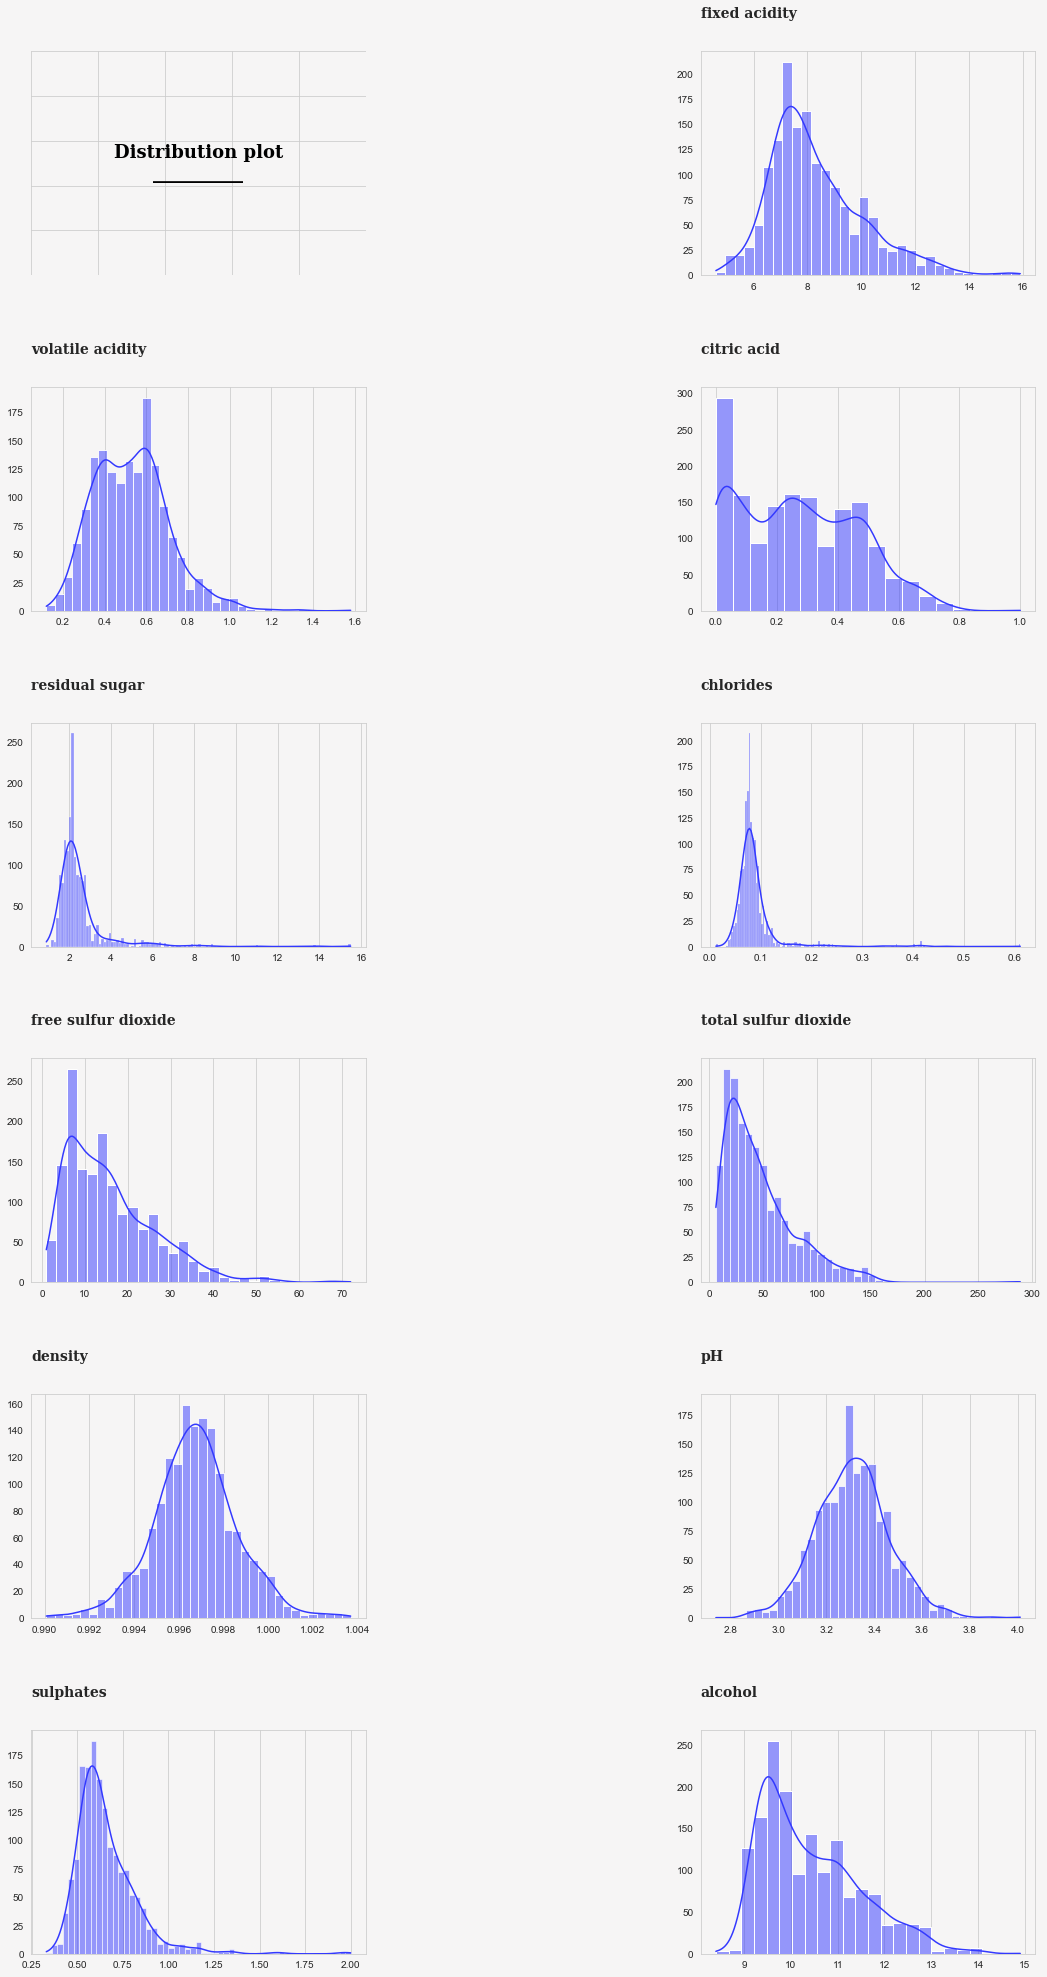

In [42]:
fig = plt.figure(figsize=(18,35))
gs = fig.add_gridspec(6,2)
gs.update(wspace=1, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

background_color = "#f6f5f5"
color_palette = ["#FA5458","#FDD563","#5F63F1"]

fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 
ax9.set_facecolor(background_color) 
ax10.set_facecolor(background_color) 
ax11.set_facecolor(background_color) 


# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Distribution plot\n__________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax1,x=data['fixed acidity'],color= "#3339FF", kde=True)
Xstart, Xend = ax1.get_xlim()
Ystart, Yend = ax1.get_ylim()
ax1.text(Xstart, Yend+(Yend*0.15), 'fixed acidity', fontsize=14, fontweight='bold', fontfamily='serif')
ax1.set_xlabel("")
ax1.set_ylabel("")

ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax2,x=data['volatile acidity'],color= "#3339FF", kde=True)
Xstart, Xend = ax2.get_xlim()
Ystart, Yend = ax2.get_ylim()
ax2.text(Xstart, Yend+(Yend*0.15), 'volatile acidity', fontsize=14, fontweight='bold', fontfamily='serif')
ax2.set_xlabel("")
ax2.set_ylabel("")

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax3,x=data['citric acid'],color= "#3339FF", kde=True)
Xstart, Xend = ax3.get_xlim()
Ystart, Yend = ax3.get_ylim()
ax3.text(Xstart, Yend+(Yend*0.15), 'citric acid', fontsize=14, fontweight='bold', fontfamily='serif')
ax3.set_xlabel("")
ax3.set_ylabel("")

ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax4,x=data['residual sugar'],color= "#3339FF", kde=True)
Xstart, Xend = ax4.get_xlim()
Ystart, Yend = ax4.get_ylim()
ax4.text(Xstart, Yend+(Yend*0.15), 'residual sugar', fontsize=14, fontweight='bold', fontfamily='serif')
ax4.set_xlabel("")
ax4.set_ylabel("")

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax5,x=data['chlorides'],color= "#3339FF", kde=True)
Xstart, Xend = ax5.get_xlim()
Ystart, Yend = ax5.get_ylim()
ax5.text(Xstart, Yend+(Yend*0.15), 'chlorides', fontsize=14, fontweight='bold', fontfamily='serif')
ax5.set_xlabel("")
ax5.set_ylabel("")

ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax6,x=data['free sulfur dioxide'],color= "#3339FF", kde=True)
Xstart, Xend = ax6.get_xlim()
Ystart, Yend = ax6.get_ylim()
ax6.text(Xstart, Yend+(Yend*0.15), 'free sulfur dioxide', fontsize=14, fontweight='bold', fontfamily='serif')
ax6.set_xlabel("")
ax6.set_ylabel("")

ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax7,x=data['total sulfur dioxide'],color= "#3339FF", kde=True)
Xstart, Xend = ax7.get_xlim()
Ystart, Yend = ax7.get_ylim()
ax7.text(Xstart, Yend+(Yend*0.15), 'total sulfur dioxide', fontsize=14, fontweight='bold', fontfamily='serif')
ax7.set_xlabel("")
ax7.set_ylabel("")

ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax8,x=data['density'],color= "#3339FF", kde=True)
Xstart, Xend = ax8.get_xlim()
Ystart, Yend = ax8.get_ylim()
ax8.text(Xstart, Yend+(Yend*0.15), 'density', fontsize=14, fontweight='bold', fontfamily='serif')
ax8.set_xlabel("")
ax8.set_ylabel("")

ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax9,x=data['pH'],color= "#3339FF", kde=True)
Xstart, Xend = ax9.get_xlim()
Ystart, Yend = ax9.get_ylim()
ax9.text(Xstart, Yend+(Yend*0.15), 'pH', fontsize=14, fontweight='bold', fontfamily='serif')
ax9.set_xlabel("")
ax9.set_ylabel("")

ax10.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax10,x=data['sulphates'],color= "#3339FF", kde=True)
Xstart, Xend = ax10.get_xlim()
Ystart, Yend = ax10.get_ylim()
ax10.text(Xstart, Yend+(Yend*0.15), 'sulphates', fontsize=14, fontweight='bold', fontfamily='serif')
ax10.set_xlabel("")
ax10.set_ylabel("")

ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax11,x=data['alcohol'],color= "#3339FF", kde=True)
Xstart, Xend = ax11.get_xlim()
Ystart, Yend = ax11.get_ylim()
ax11.text(Xstart, Yend+(Yend*0.15), 'alcohol', fontsize=14, fontweight='bold', fontfamily='serif')
ax11.set_xlabel("")
ax11.set_ylabel("")

#### None of the features seems to be skewed. Residual sugar and Chlorides seems to be a little bit right skewed, but not much, so can be ignored.


Boxplots ...

Text(0, 0.5, '')

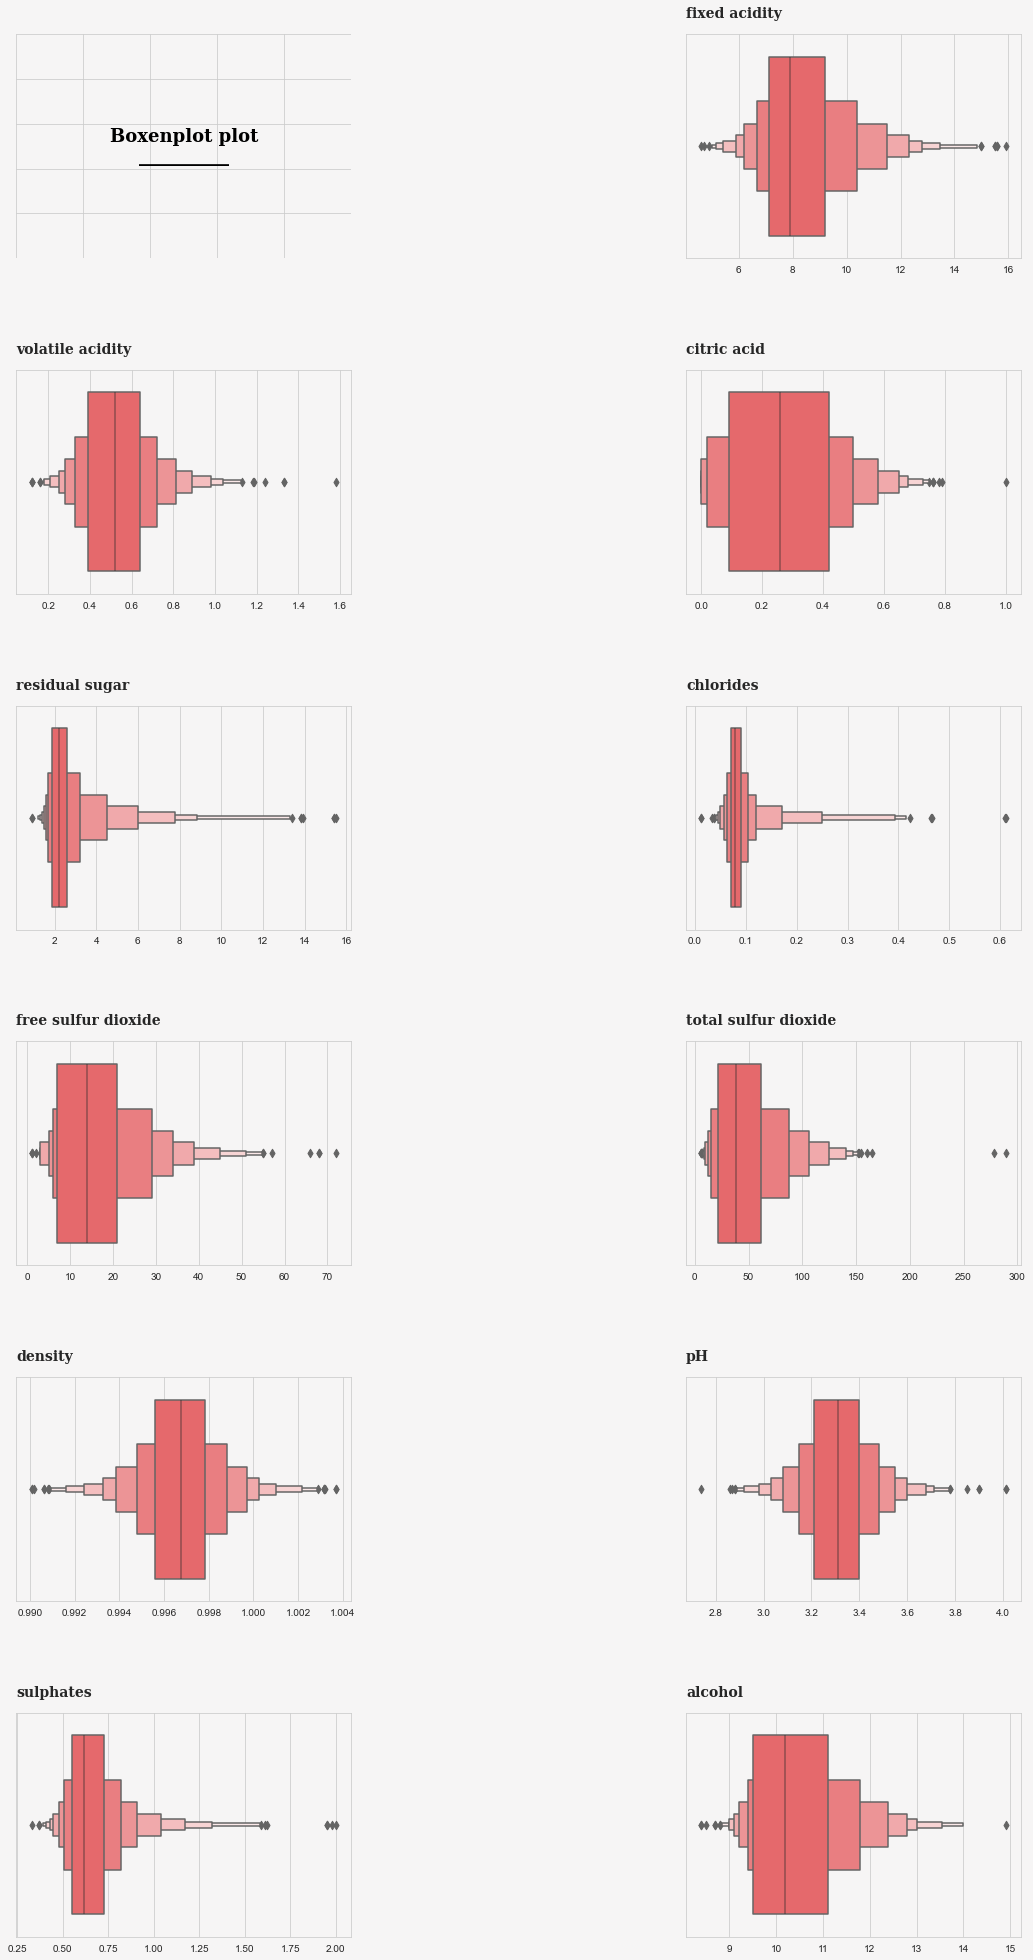

In [18]:
fig = plt.figure(figsize=(18,35))
gs = fig.add_gridspec(6,2)
gs.update(wspace=1, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

background_color = "#f6f5f5"
color_palette = ["#FA5458","#FDD563","#5F63F1"]

fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 
ax9.set_facecolor(background_color) 
ax10.set_facecolor(background_color) 
ax11.set_facecolor(background_color) 


# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxenplot plot\n__________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,x=data['fixed acidity'],color= "#FA5458")
Xstart, Xend = ax1.get_xlim()
Ystart, Yend = ax1.get_ylim()
ax1.text(Xstart, Yend+(Yend*0.15), 'fixed acidity', fontsize=14, fontweight='bold', fontfamily='serif')
ax1.set_xlabel("")
ax1.set_ylabel("")

ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,x=data['volatile acidity'],color= "#FA5458")
Xstart, Xend = ax2.get_xlim()
Ystart, Yend = ax2.get_ylim()
ax2.text(Xstart, Yend+(Yend*0.15), 'volatile acidity', fontsize=14, fontweight='bold', fontfamily='serif')
ax2.set_xlabel("")
ax2.set_ylabel("")

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,x=data['citric acid'],color= "#FA5458")
Xstart, Xend = ax3.get_xlim()
Ystart, Yend = ax3.get_ylim()
ax3.text(Xstart, Yend+(Yend*0.15), 'citric acid', fontsize=14, fontweight='bold', fontfamily='serif')
ax3.set_xlabel("")
ax3.set_ylabel("")

ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,x=data['residual sugar'],color= "#FA5458")
Xstart, Xend = ax4.get_xlim()
Ystart, Yend = ax4.get_ylim()
ax4.text(Xstart, Yend+(Yend*0.15), 'residual sugar', fontsize=14, fontweight='bold', fontfamily='serif')
ax4.set_xlabel("")
ax4.set_ylabel("")

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,x=data['chlorides'],color= "#FA5458")
Xstart, Xend = ax5.get_xlim()
Ystart, Yend = ax5.get_ylim()
ax5.text(Xstart, Yend+(Yend*0.15), 'chlorides', fontsize=14, fontweight='bold', fontfamily='serif')
ax5.set_xlabel("")
ax5.set_ylabel("")

ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax6,x=data['free sulfur dioxide'],color= "#FA5458")
Xstart, Xend = ax6.get_xlim()
Ystart, Yend = ax6.get_ylim()
ax6.text(Xstart, Yend+(Yend*0.15), 'free sulfur dioxide', fontsize=14, fontweight='bold', fontfamily='serif')
ax6.set_xlabel("")
ax6.set_ylabel("")

ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax7,x=data['total sulfur dioxide'],color= "#FA5458")
Xstart, Xend = ax7.get_xlim()
Ystart, Yend = ax7.get_ylim()
ax7.text(Xstart, Yend+(Yend*0.15), 'total sulfur dioxide', fontsize=14, fontweight='bold', fontfamily='serif')
ax7.set_xlabel("")
ax7.set_ylabel("")

ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax8,x=data['density'],color= "#FA5458")
Xstart, Xend = ax8.get_xlim()
Ystart, Yend = ax8.get_ylim()
ax8.text(Xstart, Yend+(Yend*0.15), 'density', fontsize=14, fontweight='bold', fontfamily='serif')
ax8.set_xlabel("")
ax8.set_ylabel("")

ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9,x=data['pH'],color= "#FA5458")
Xstart, Xend = ax9.get_xlim()
Ystart, Yend = ax9.get_ylim()
ax9.text(Xstart, Yend+(Yend*0.15), 'pH', fontsize=14, fontweight='bold', fontfamily='serif')
ax9.set_xlabel("")
ax9.set_ylabel("")

ax10.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax10,x=data['sulphates'],color= "#FA5458")
Xstart, Xend = ax10.get_xlim()
Ystart, Yend = ax10.get_ylim()
ax10.text(Xstart, Yend+(Yend*0.15), 'sulphates', fontsize=14, fontweight='bold', fontfamily='serif')
ax10.set_xlabel("")
ax10.set_ylabel("")

ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax11,x=data['alcohol'],color= "#FA5458")
Xstart, Xend = ax11.get_xlim()
Ystart, Yend = ax11.get_ylim()
ax11.text(Xstart, Yend+(Yend*0.15), 'alcohol', fontsize=14, fontweight='bold', fontfamily='serif')
ax11.set_xlabel("")
ax11.set_ylabel("")

Almost all the features consists of outliers. But among (1599) tuples present in the dataset, removing the outliers will lead to a loss of training data. The accuracy of the model can be checked in both of the cases. Before and after removal of tha outliers.

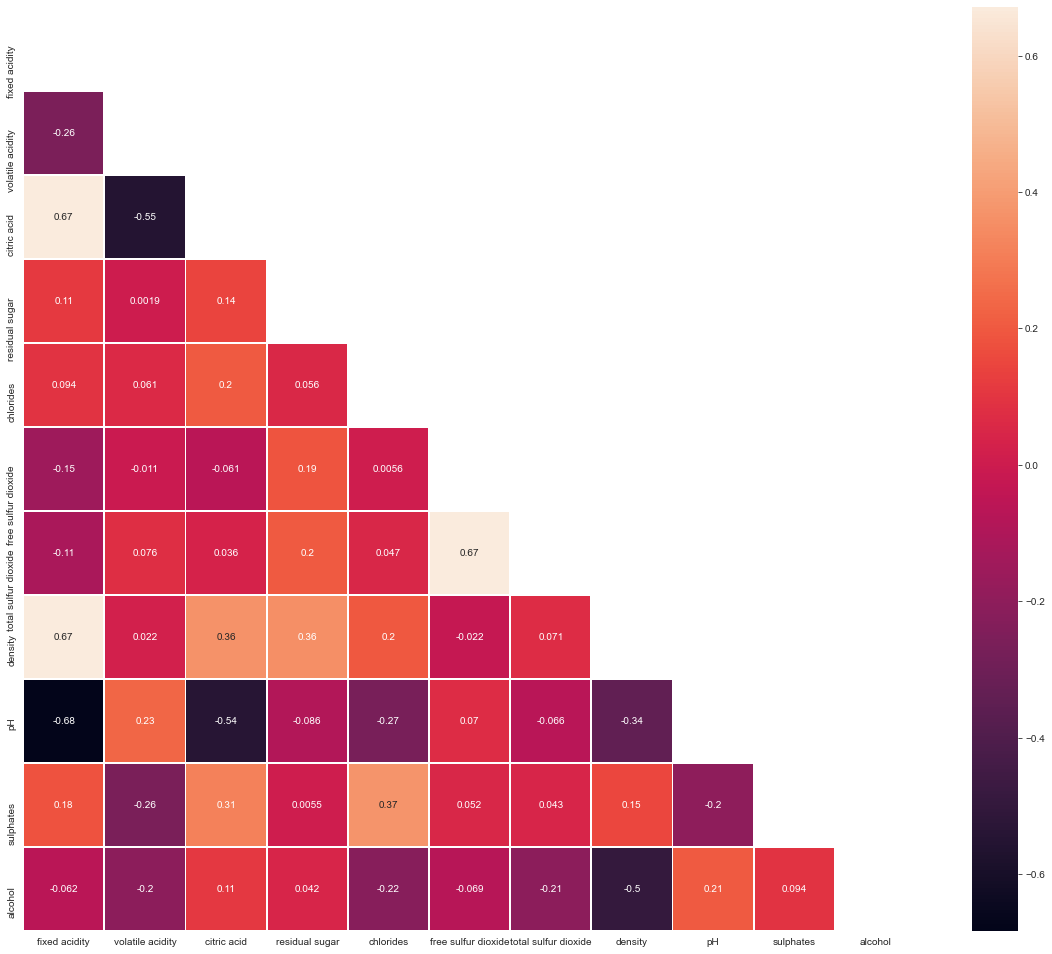

In [19]:
plt.figure(figsize=(20, 17))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="rocket");

 there's hardly any correlation between the features.

##### Feature selection : features correlation with target variable 'quality' 

In [43]:
corr = data.corr()
corr.transpose().loc[:, ["quality"]].sort_values(by="quality",ascending=False)

,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


##### So we intend to select features based on their corr values , i.e 
##### We are setting the threshold as |0.1|
##### we are neglecting values whose values are less than |0.1|.


In [ ]:
residual sugar, free sulfur dioxide,pH

Plotting pair plots with respect to target features 

Text(0, 0.5, '')

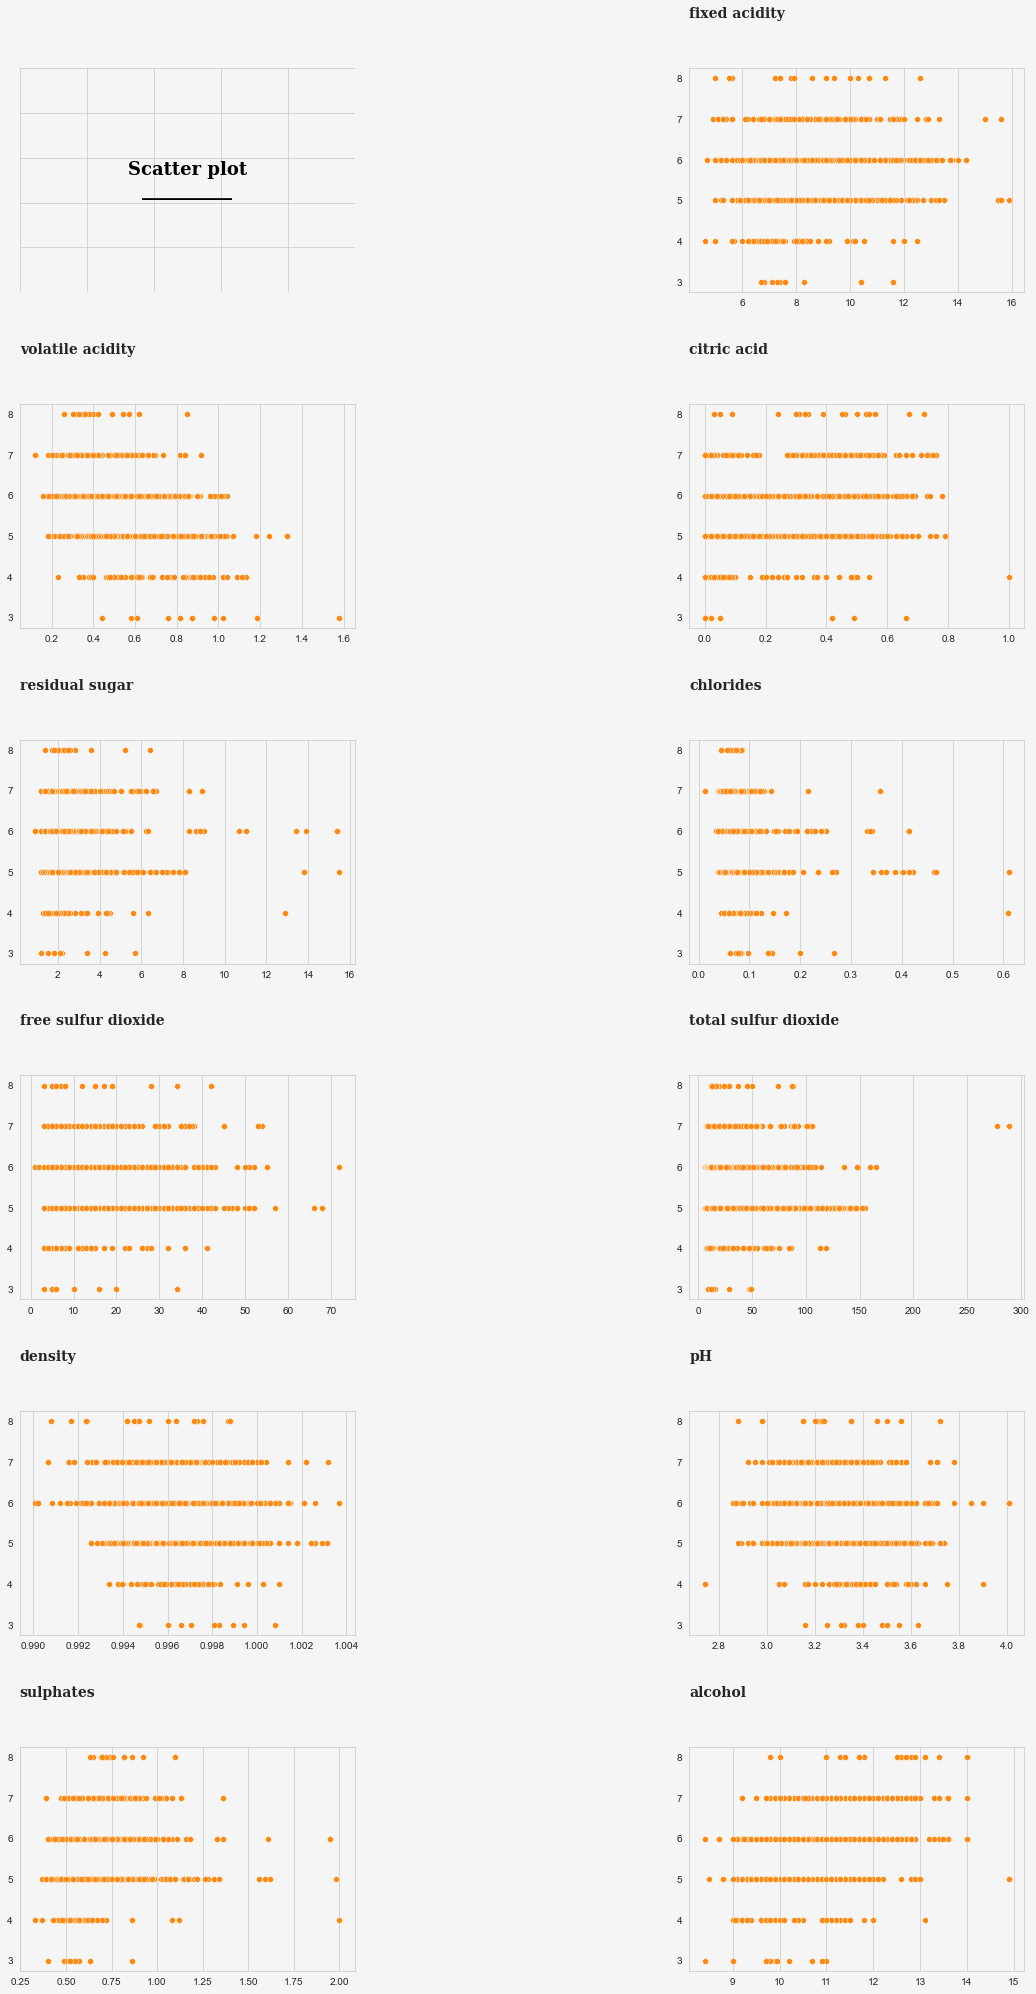

In [44]:
fig = plt.figure(figsize=(18,35))
gs = fig.add_gridspec(6,2)
gs.update(wspace=1, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

background_color = "#f6f5f5"
color_palette = ["#FA5458","#FDD563","#5F63F1"]

fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 
ax9.set_facecolor(background_color) 
ax10.set_facecolor(background_color) 
ax11.set_facecolor(background_color) 


# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Scatter plot\n__________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax1,x='fixed acidity',y='quality',data=data,color= "#ff8811")
Xstart, Xend = ax1.get_xlim()
Ystart, Yend = ax1.get_ylim()
ax1.text(Xstart, Yend+(Yend*0.15), 'fixed acidity', fontsize=14, fontweight='bold', fontfamily='serif')
ax1.set_xlabel("")
ax1.set_ylabel("")

ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax2,x='volatile acidity',y='quality',data=data,color= "#ff8811")
Xstart, Xend = ax2.get_xlim()
Ystart, Yend = ax2.get_ylim()
ax2.text(Xstart, Yend+(Yend*0.15), 'volatile acidity', fontsize=14, fontweight='bold', fontfamily='serif')
ax2.set_xlabel("")
ax2.set_ylabel("")

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax3,x='citric acid',y='quality',data=data,color= "#ff8811")
Xstart, Xend = ax3.get_xlim()
Ystart, Yend = ax3.get_ylim()
ax3.text(Xstart, Yend+(Yend*0.15), 'citric acid', fontsize=14, fontweight='bold', fontfamily='serif')
ax3.set_xlabel("")
ax3.set_ylabel("")

ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax4,x='residual sugar',y='quality',data=data,color= "#ff8811")
Xstart, Xend = ax4.get_xlim()
Ystart, Yend = ax4.get_ylim()
ax4.text(Xstart, Yend+(Yend*0.15), 'residual sugar', fontsize=14, fontweight='bold', fontfamily='serif')
ax4.set_xlabel("")
ax4.set_ylabel("")

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax5,x='chlorides',y='quality',data=data,color= "#ff8811")
Xstart, Xend = ax5.get_xlim()
Ystart, Yend = ax5.get_ylim()
ax5.text(Xstart, Yend+(Yend*0.15), 'chlorides', fontsize=14, fontweight='bold', fontfamily='serif')
ax5.set_xlabel("")
ax5.set_ylabel("")

ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax6,x='free sulfur dioxide',y='quality',data=data,color= "#ff8811")
Xstart, Xend = ax6.get_xlim()
Ystart, Yend = ax6.get_ylim()
ax6.text(Xstart, Yend+(Yend*0.15), 'free sulfur dioxide', fontsize=14, fontweight='bold', fontfamily='serif')
ax6.set_xlabel("")
ax6.set_ylabel("")

ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax7,x='total sulfur dioxide',y='quality',data=data,color= "#ff8811")
Xstart, Xend = ax7.get_xlim()
Ystart, Yend = ax7.get_ylim()
ax7.text(Xstart, Yend+(Yend*0.15), 'total sulfur dioxide', fontsize=14, fontweight='bold', fontfamily='serif')
ax7.set_xlabel("")
ax7.set_ylabel("")

ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax8,x='density',y='quality',data=data,color= "#ff8811")
Xstart, Xend = ax8.get_xlim()
Ystart, Yend = ax8.get_ylim()
ax8.text(Xstart, Yend+(Yend*0.15), 'density', fontsize=14, fontweight='bold', fontfamily='serif')
ax8.set_xlabel("")
ax8.set_ylabel("")

ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax9,x='pH',y='quality',data=data,color= "#ff8811")
Xstart, Xend = ax9.get_xlim()
Ystart, Yend = ax9.get_ylim()
ax9.text(Xstart, Yend+(Yend*0.15), 'pH', fontsize=14, fontweight='bold', fontfamily='serif')
ax9.set_xlabel("")
ax9.set_ylabel("")

ax10.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax10,x='sulphates',y='quality',data=data,color= "#ff8811")
Xstart, Xend = ax10.get_xlim()
Ystart, Yend = ax10.get_ylim()
ax10.text(Xstart, Yend+(Yend*0.15), 'sulphates', fontsize=14, fontweight='bold', fontfamily='serif')
ax10.set_xlabel("")
ax10.set_ylabel("")

ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax11,x='alcohol',y='quality',data=data,color= "#ff8811")
Xstart, Xend = ax11.get_xlim()
Ystart, Yend = ax11.get_ylim()
ax11.text(Xstart, Yend+(Yend*0.15), 'alcohol', fontsize=14, fontweight='bold', fontfamily='serif')
ax11.set_xlabel("")
ax11.set_ylabel("")

In [45]:
data['newquality']=new
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,newquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [46]:
#data['newquality'].value_counts()

from collections import Counter
print(sorted(Counter(data['newquality']).items()))

[(1, 855), (2, 744)]


C:\Users\91730\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newquality', ylabel='count'>

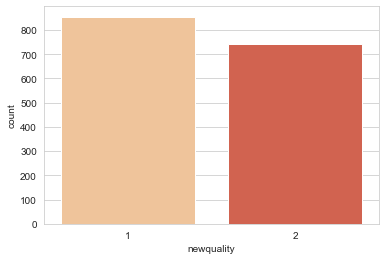

In [47]:
sns.countplot(data['newquality'],palette='OrRd')

#### We wil consider only those features that have a positive correlation with the target feature(quality)

In [68]:
X=data.drop(['quality','newquality','residual sugar','free sulfur dioxide','pH'],axis=1)
Y=data['newquality']

In [69]:
X.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4


In [70]:
Y.head()

0    2
1    2
2    2
3    1
4    2
Name: newquality, dtype: int64

###  Scaling the features : Normalization on X:

In [71]:
#Normalizing the X

X.astype(float)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

##########################Normalizing the data #########################################################################

from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
norm = MinMaxScaler().fit(x_train)

x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)



In [72]:
#Create a function with many machine learning models

def models(x_train, y_train):
    
    #Use Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(x_train, y_train)
    
    #Use KNeighbours
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
    knn.fit(x_train, y_train)
    
    #Use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(x_train, y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(x_train, y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(x_train, y_train)
    
    print("Training Accuracy of Each model")
    print("[1]Logistic Regression: ", log.score(x_train, y_train))
    print("[2]KNeighbors Regression: ", knn.score(x_train, y_train))
    print("[3]GaussianNB : ", gauss.score(x_train, y_train))
    print("[4]Decision Tree Classifier: ", tree.score(x_train, y_train))
    print("[5]Random Forest Classifier: ", forest.score(x_train, y_train))
    
    return log, knn, gauss, tree, forest

In [73]:
#Get and train all the models

model = models(x_train_norm, y_train)


Training Accuracy of Each model
[1]Logistic Regression:  0.7412040656763096
[2]KNeighbors Regression:  0.818608287724785
[3]GaussianNB :  0.7294761532447225
[4]Decision Tree Classifier:  1.0
[5]Random Forest Classifier:  0.9867083659108679


##### The above scores indicate that the accuracy of Decision Tree is 100% which is not reliable. The second best accuracy is of Random Forest Classifier. Hence, we will take Random Forest Classifier into consideration for training the model and perform further analysis.


In [74]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier(n_estimators=10)
tree.fit(x_train_norm, y_train)

y_pred = tree.predict(x_test_norm)


<AxesSubplot:>

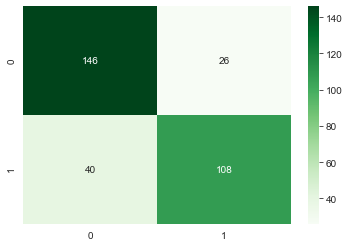

In [75]:
#Creating the confusion matrix

from sklearn.metrics import confusion_matrix
 
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.85      0.78      0.82       186
           2       0.73      0.81      0.77       134

    accuracy                           0.79       320
   macro avg       0.79      0.80      0.79       320
weighted avg       0.80      0.79      0.79       320



Maximum accuracy: 0.840625      n_estimators :  18


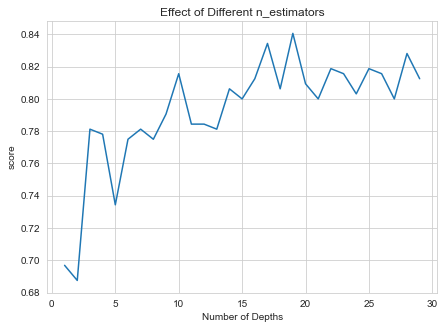

In [77]:
#Lets experiment with different n_estimators in random forest tree

estimators = np.arange(1,30,1)
scores =[]
for i in range(1,30,1):
    tree=RandomForestClassifier(n_estimators=i)
    tree.fit(x_train_norm, y_train)
    scores.append(tree.score(x_test_norm, y_test))
    
plt.figure(figsize=(7, 5))
plt.title("Effect of Different n_estimators")
plt.xlabel("Number of Depths")
plt.ylabel("score")
plt.plot(estimators, scores)
    
print("Maximum accuracy:",max(scores) , "     n_estimators : ", scores.index(max(scores)))